# **Load Data and Checking Information**

In [1]:
# importing necessary libraries and loading the dataset.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset
file_path = '/content/Fixed_cleaned_activities.csv'
athlete_data = pd.read_csv(file_path)

# Display First few Rows of Dataset
print("\nFirst few Rows of Dataset:\n")
print(athlete_data.head())


First few Rows of Dataset:

   Activity ID Activity Type   Begin Timestamp     End Timestamp  \
0   2284658991       Running   4/11/2017 12:07   4/11/2017 13:06   
1   2284658936       Running    3/11/2017 9:47   3/11/2017 10:35   
2   2228102647       Running  25/10/2017 16:31  25/10/2017 17:11   
3   2104984694       Running  13/10/2017 11:53  13/10/2017 12:41   
4   2084195352       Running   2/10/2017 14:51   2/10/2017 15:38   

   Max. Elevation (Raw)  Min. Elevation (Raw)  Elevation Gain (Raw)  \
0                 472.6            240.800003                 315.0   
1                 473.2            241.800003                 245.0   
2                 278.8            186.399994                 208.0   
3                 471.6            239.399994                 246.0   
4                 494.6            263.600006                 246.0   

   Elevation Loss (Raw)  Average Heart Rate (bpm)  Min. Heart Rate (bpm)  ...  \
0                 314.0                     182.0     



**- Imported essential libraries such as `pandas`, `matplotlib`, `numpy`, and `seaborn` for data analysis and visualization.**

**- Loaded the dataset `Fixed_cleaned_activities.csv` from the specified file path into a DataFrame named `athlete_data`.**

**- Displayed the first few rows of the dataset to get an overview of the structure and initial values of the data.**







# **Filter Columns (Metrics)**

In [2]:
# selected columns from the dataset
selected_columns_final = [
    'Begin Timestamp',               # Start time of the activity
    'Moving Duration (seconds)',     # Proxy for time
    'Distance (Raw)',                # Total distance covered
    'Average Speed',                 # Average speed during the activity
    'Average Heart Rate (bpm)',      # Average heart rate
    'Calories',                      # Calories burned
    'Average Cadence'                # Average cadence
]

# Selecting only the relevant columns
filtered_metrics = athlete_data[selected_columns_final]

# Display the first few rows of the filtered dataset
print("\nFiltered dataset with selected metrics:")
filtered_metrics.head()



Filtered dataset with selected metrics:


,Begin Timestamp,Moving Duration (seconds),Distance (Raw),Average Speed,Average Heart Rate (bpm),Calories,Average Cadence
0,4/11/2017 12:07,3530,8.66881,8.845209,182.0,753,76.280294
1,3/11/2017 9:47,2882,7.62835,9.523810,177.0,626,79.153651
2,25/10/2017 16:31,2324,6.60755,10.227273,179.0,528,78.334207
3,13/10/2017 11:53,2877,7.75709,9.703504,180.0,661,78.191039
4,2/10/2017 14:51,2824,7.81321,9.972299,174.0,619,78.547063




**- Defined a list of selected columns (`selected_columns_final`) to focus on key metrics such as activity start time, distance, speed, heart rate, calories, and cadence.**

**- Created a new DataFrame (`filtered_metrics`) containing only these selected columns from the original dataset for subsequent analysis.**

**- Displayed the first few rows of the filtered dataset to check the selected metrics and understand the data structure.**

# **Descriptive Statistics**

In [3]:
# descriptive statistics for the selected metrics
print("\nDescriptive statistics for the selected metrics:")
descriptive_stats = filtered_metrics.describe()
print(descriptive_stats)


Descriptive statistics for the selected metrics:
       Moving Duration (seconds)  Distance (Raw)  Average Speed  \
count               1.550000e+02      155.000000     155.000000   
mean                1.590367e+04       26.776991      10.264121   
std                 1.680284e+05      251.049566       1.157265   
min                 9.440000e+02        2.701190       4.215457   
25%                 1.603500e+03        5.016340       9.625737   
50%                 2.257000e+03        6.107940      10.198300   
75%                 2.897500e+03        7.773235      11.076923   
max                 2.094296e+06     3132.000000      12.500000   

       Average Heart Rate (bpm)     Calories  Average Cadence  
count                155.000000   155.000000       155.000000  
mean                 173.736981   523.625806        79.266212  
std                    5.796893   204.477038         1.674281  
min                  135.000000   224.000000        76.079365  
25%                  170.3

**- Generated descriptive statistics for the filtered dataset metrics using the `describe()` method, providing a summary of statistical measures.**

**- Displayed key information such as count, mean, standard deviation, minimum, and maximum values for each selected metric.**

**- These statistics offer insights into the distribution, central tendency, and variability of the metrics, aiding in better understanding of the dataset's characteristics.**

# **PART-A: Basic Analysis**

# **Trend of Time Over Other Metrics**

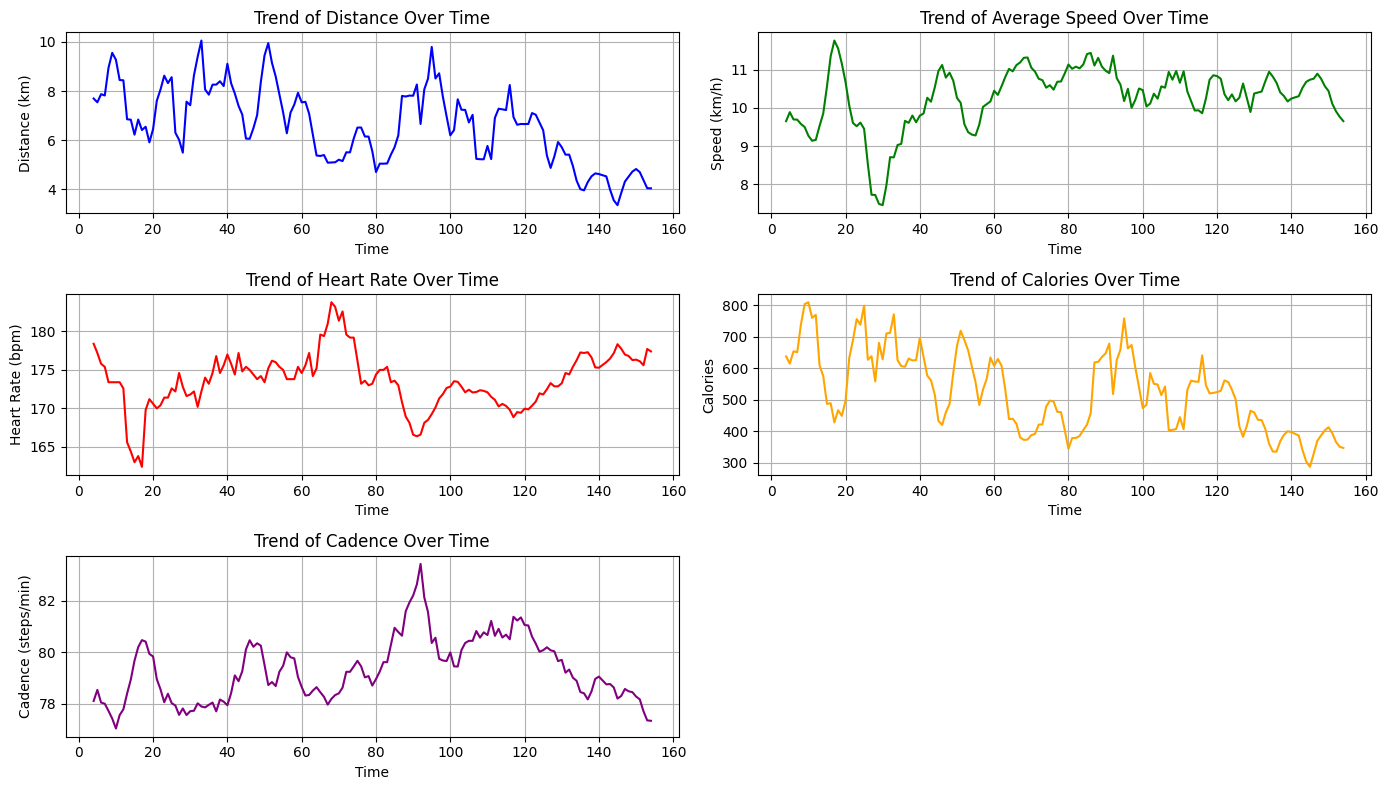

In [4]:

filtered_metrics = filtered_metrics.copy()

# Handling outliers by removing extreme values
filtered_metrics = filtered_metrics[
    (filtered_metrics['Distance (Raw)'] < 50) &  # Distance below 50 km
    (filtered_metrics['Calories'] < 2000) &  # Calories below 2000
    (filtered_metrics['Average Speed'] < 15)  # Speed below 15 km/h
]

# Applying rolling averages to smooth trends
filtered_metrics['Distance (Rolling Avg)'] = filtered_metrics['Distance (Raw)'].rolling(window=5).mean()
filtered_metrics['Calories (Rolling Avg)'] = filtered_metrics['Calories'].rolling(window=5).mean()
filtered_metrics['Speed (Rolling Avg)'] = filtered_metrics['Average Speed'].rolling(window=5).mean()
filtered_metrics['Heart Rate (Rolling Avg)'] = filtered_metrics['Average Heart Rate (bpm)'].rolling(window=5).mean()
filtered_metrics['Cadence (Rolling Avg)'] = filtered_metrics['Average Cadence'].rolling(window=5).mean()

# Plotting trends
plt.figure(figsize=(14, 8))

# Distance vs Time
plt.subplot(3, 2, 1)
plt.plot(filtered_metrics.index, filtered_metrics['Distance (Rolling Avg)'], color='blue')
plt.title('Trend of Distance Over Time')
plt.xlabel('Time')
plt.ylabel('Distance (km)')
plt.grid()

# Speed vs Time
plt.subplot(3, 2, 2)
plt.plot(filtered_metrics.index, filtered_metrics['Speed (Rolling Avg)'], color='green')
plt.title('Trend of Average Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Speed (km/h)')
plt.grid()

# Heart Rate vs Time
plt.subplot(3, 2, 3)
plt.plot(filtered_metrics.index, filtered_metrics['Heart Rate (Rolling Avg)'], color='red')
plt.title('Trend of Heart Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.grid()

# Calories vs Time
plt.subplot(3, 2, 4)
plt.plot(filtered_metrics.index, filtered_metrics['Calories (Rolling Avg)'], color='orange')
plt.title('Trend of Calories Over Time')
plt.xlabel('Time')
plt.ylabel('Calories')
plt.grid()

# Cadence vs Time
plt.subplot(3, 2, 5)
plt.plot(filtered_metrics.index, filtered_metrics['Cadence (Rolling Avg)'], color='purple')
plt.title('Trend of Cadence Over Time')
plt.xlabel('Time')
plt.ylabel('Cadence (steps/min)')
plt.grid()

# Adjust layout and display
plt.tight_layout()
plt.show()




### **Trend of Metrics Over Time**
- **Objective**: To visualize trends over time for key metrics such as distance, speed, heart rate, calories, and cadence.
- **Data Processing**:
  - **Outlier Removal**: Removed extreme values for `Distance`, `Calories`, and `Average Speed` to reduce skewness and improve trend accuracy.
  - **Smoothing Trends**: Applied rolling averages with a window of 5 to smooth the values and reduce noise in the data.
-**Trends/Patterns Observed in the Plots**
  1. **Distance Over Time**:
   - There is considerable fluctuation in the distances covered, indicating variability in the athlete's training intensity or session type.
   - Notably, the average distance tends to drop around the latter part of the timeline, suggesting reduced training volume, possibly due to rest periods or a change in training focus.

  2. **Average Speed Over Time**:
   - The speed generally remains steady with visible peaks, implying a relatively consistent pace with occasional speed-focused sessions.
   - Peaks in speed are fewer and distinct, indicating that high-speed efforts were not the norm, but rather specific training points.

 3. **Heart Rate Over Time**:
   - The heart rate starts relatively lower but increases and stays consistently higher later on, which may suggest either improvement in intensity or adaptation to a more challenging training regimen.
   - Spikes in heart rate seem to align with potential high-speed or long-duration efforts, possibly during interval training sessions.

 4. **Calories Over Time**:
   - The calories burned show a close relationship with both distance and intensity, indicated by peaks during longer or more intense sessions.
   - The trend shows an overall reduction towards the end, suggesting that training has become lighter or that the athlete is engaging in shorter duration workouts.

 5. **Cadence Over Time**:
   - The cadence follows a stable pattern with minor fluctuations, gradually increasing at some points before declining towards the end, suggesting a drop in effort or fatigue.
   - Higher cadence moments likely reflect shorter, fast-paced sessions, while lower cadence periods might indicate longer endurance sessions or fatigue setting in during long runs.



# **Trend of Distance over other Metrics**

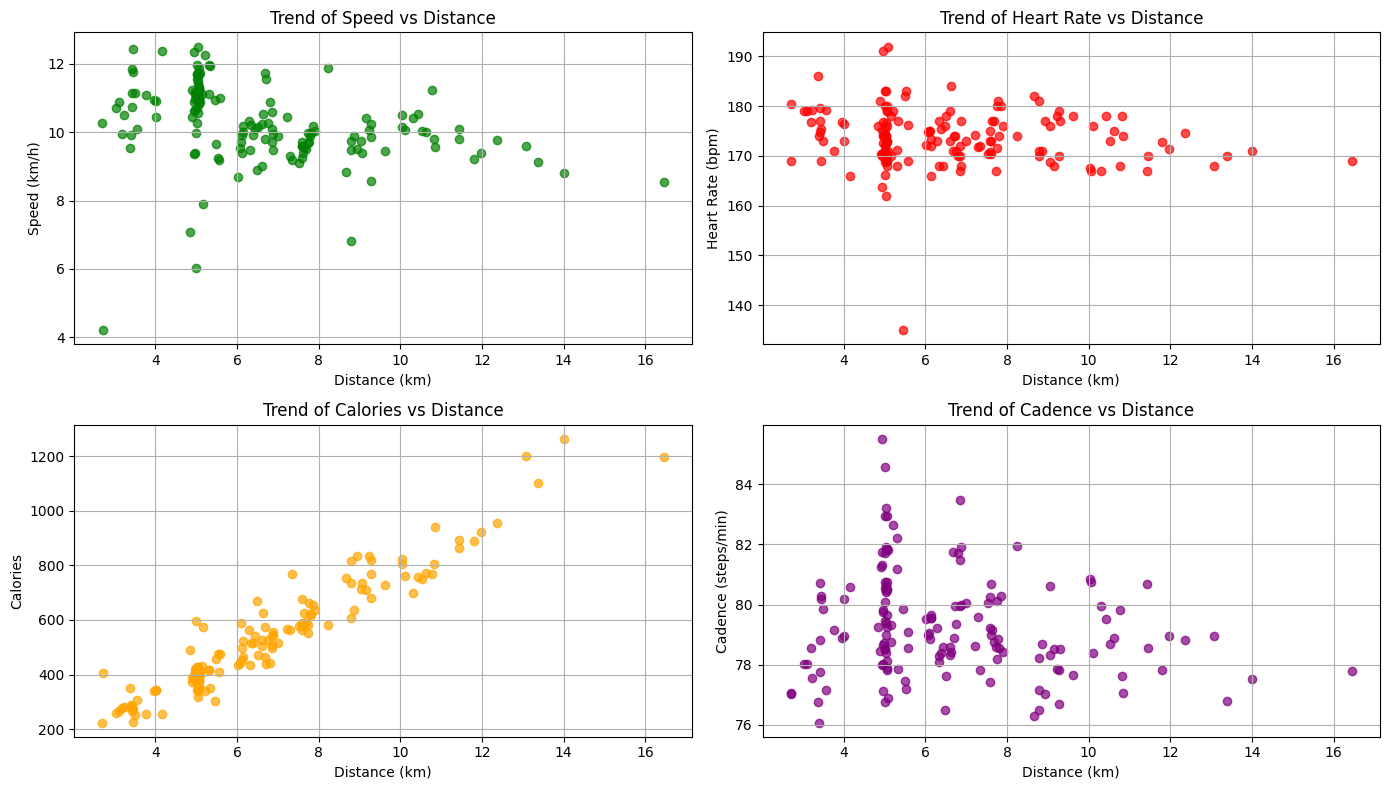

In [5]:
# Plotting trends over distance
plt.figure(figsize=(14, 8))

# Speed vs Distance
plt.subplot(2, 2, 1)
plt.scatter(filtered_metrics['Distance (Raw)'], filtered_metrics['Average Speed'], color='green', alpha=0.7)
plt.title('Trend of Speed vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Speed (km/h)')
plt.grid()

# Heart Rate vs Distance
plt.subplot(2, 2, 2)
plt.scatter(filtered_metrics['Distance (Raw)'], filtered_metrics['Average Heart Rate (bpm)'], color='red', alpha=0.7)
plt.title('Trend of Heart Rate vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Heart Rate (bpm)')
plt.grid()

# Calories vs Distance
plt.subplot(2, 2, 3)
plt.scatter(filtered_metrics['Distance (Raw)'], filtered_metrics['Calories'], color='orange', alpha=0.7)
plt.title('Trend of Calories vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Calories')
plt.grid()

# Cadence vs Distance
plt.subplot(2, 2, 4)
plt.scatter(filtered_metrics['Distance (Raw)'], filtered_metrics['Average Cadence'], color='purple', alpha=0.7)
plt.title('Trend of Cadence vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Cadence (steps/min)')
plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()




## **Trend of Distance Over Other Metrics**
- **Objective**: To examine how various metrics such as speed, heart rate, calories burned, and cadence relate to the distance covered by the athlete.

### Patterns/Trends Observed in Each Plot
1. **Speed vs Distance**:
   - Most runs are concentrated in the 6-10 km distance range with average speeds typically around 10 km/h.
   - There is no clear trend showing a significant increase or decrease in speed as distance changes, suggesting that speed is relatively consistent regardless of the run's length.

2. **Heart Rate vs Distance**:
   - The heart rate tends to cluster around 170-180 bpm across different distances, implying that the athlete maintains a similar effort level regardless of the distance.
   - A few data points with lower heart rates at shorter distances might indicate either light training or warm-up sessions.

3. **Calories vs Distance**:
   - A clear positive trend shows as the distance increases, the calories burned also increase linearly.
   - This straightforward trend indicates that the calorie expenditure is directly proportional to the running distance, which is expected as longer workouts naturally burn more calories.

4. **Cadence vs Distance**:
   - Cadence is mostly scattered between 78 to 82 steps/min across all distances, indicating a fairly stable stride rate during different run lengths.
   - Slight variation is visible, but the overall pattern suggests cadence doesn’t vary significantly with distance, hinting at the athlete’s consistent running rhythm.



# **Correlation Matrix Calculation For Relation Between the Variables**


Correlation Matrix:
                          Distance (Raw)  Average Speed  \
Distance (Raw)                  1.000000      -0.332136   
Average Speed                  -0.332136       1.000000   
Average Heart Rate (bpm)       -0.149645      -0.038291   
Calories                        0.957144      -0.476659   
Average Cadence                -0.175064       0.533863   

                          Average Heart Rate (bpm)  Calories  Average Cadence  
Distance (Raw)                           -0.149645  0.957144        -0.175064  
Average Speed                            -0.038291 -0.476659         0.533863  
Average Heart Rate (bpm)                  1.000000 -0.074358        -0.445623  
Calories                                 -0.074358  1.000000        -0.277209  
Average Cadence                          -0.445623 -0.277209         1.000000  


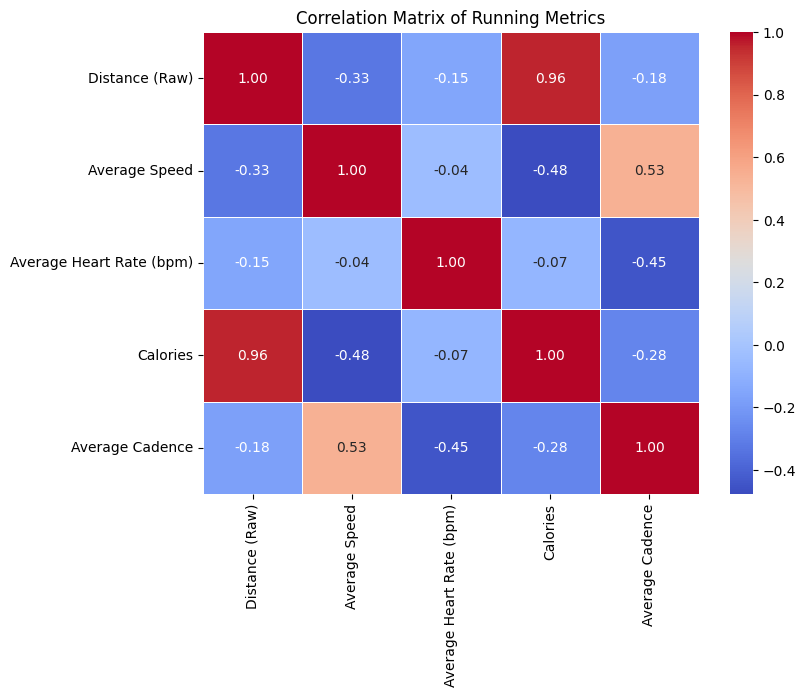

In [6]:
# Calculating the correlation matrix for the relevant metrics
correlation_matrix_metrics = filtered_metrics[['Distance (Raw)',
                                       'Average Speed',
                                       'Average Heart Rate (bpm)',
                                       'Calories',
                                       'Average Cadence']].corr()

# Displaying the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix_metrics)

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_metrics, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Running Metrics')
plt.show()




## **Correlation Matrix Calculation Between Running Metrics**
- **Objective**: To determine the strength and direction of relationships between key metrics such as distance, speed, heart rate, calories, and cadence.
- **Data Processing**:
  - Calculated the correlation matrix for selected metrics to quantify their interrelationships.
  - Visualized the correlation matrix using a heatmap to provide a more intuitive understanding of how each metric relates to others.
- **Key Observations**:
  - **Distance and Calories**: Strong positive correlation (`0.96`), indicating that as the running distance increases, calorie expenditure also consistently increases.
  - **Average Speed and Cadence**: Moderate positive correlation (`0.53`), suggesting higher cadence is often associated with higher average speed.
  - **Average Heart Rate and Cadence**: Moderate negative correlation (`-0.45`), implying that higher heart rates are generally associated with lower cadence.
- Overall, The correlation matrix reveals that distance is a primary driver for calories burned, while cadence has a mixed relationship with other metrics like speed and heart rate, highlighting different physiological responses during training.